In [9]:
import tensorflow 
import keras  
import os
import glob 
import skimage
from skimage import io 
import random 
import numpy as np
from tqdm import tqdm
from skimage import io, transform

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.pyplot as plt  
from keras.layers import Dense 
import random
import tensorflow as tf
import warnings
# filter warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [10]:
dataset_path = 'E:/FCIH-level 4/Selected 1/project/image dataset/raw-img'
class_names = ['elephant', 'mammoth']
animal_path = os.path.join(dataset_path, class_names[0], '*')
animal_path = glob.glob(animal_path)
image = io.imread(animal_path[4])  
len_elephant=len(os.listdir('E:/FCIH-level 4/Selected 1/project/image dataset/raw-img/elephant'))
print(len_elephant)
len_mammoth = len(os.listdir('E:/FCIH-level 4/Selected 1/project/image dataset/raw-img/mammoth'))
print(len_mammoth)
print(len_elephant + len_mammoth)

1446
711
2157


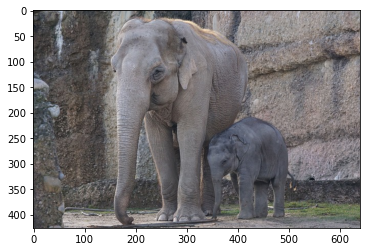

In [11]:
image = io.imread(animal_path[4])  
# plotting the original image
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

Text(0.5, 0.98, 'Original & RGB image channels')

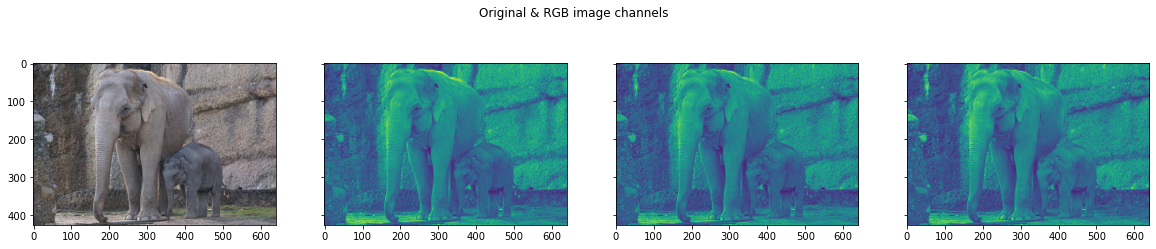

In [12]:
i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
i.set_figwidth(20) 

im1.imshow(image)  #Original image
im2.imshow(image[:, : , 0]) #Red
im3.imshow(image[:, : , 1]) #Green
im4.imshow(image[:, : , 2]) #Blue
i.suptitle('Original & RGB image channels')

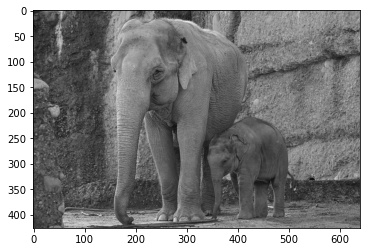

In [13]:
gray_image = skimage.color.rgb2gray(image)
plt.imshow(gray_image, cmap = 'gray')

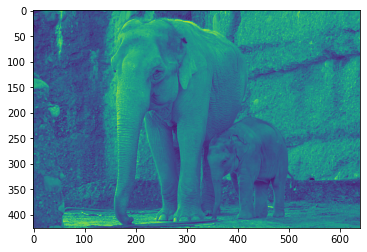

In [14]:
norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
plt.imshow(norm_image)

In [15]:
category_dir = "E:/FCIH-level 4/Selected 1/project/image dataset/raw-img"
img_size = 100

print(os.listdir(category_dir))

['elephant', 'mammoth']


In [16]:
# Read and load data 
def get_data(folder_path):
    imgs = []
    indices = []
    labels = []
    for idx, folder_name in enumerate(os.listdir(folder_path)):
        if folder_name in ( "elephant","mammoth") :
            labels.append(folder_name)
            for file_name in tqdm(os.listdir(folder_path + '/' + folder_name)):
                if file_name.endswith('jpeg') or file_name.endswith('jpg') or file_name.endswith('png') or file_name.endswith('jfif'):
                    img_file = io.imread(folder_path + '/' +  folder_name + '/' + file_name)           
                    if img_file is not None:
                        image = color.rgb2gray(img_file)
                        norm_image = (image - np.min(image)) / (np.max(image) - np.min(image))
                        img_file =resize(norm_image, (img_size,img_size))
                        imgs.append(np.asarray(img_file))
                        indices.append(idx)
    imgs = np.asarray(imgs)
    indices = np.asarray(indices).reshape(-1,1)
    labels = np.asarray(labels)
    return imgs, indices, labels
    
X, y, labels = get_data(category_dir)    
print('X shape:', X.shape)
print('y shape:', y.shape)
print("labels:",labels)
random.shuffle(X)
random.shuffle(y)

100%|██████████| 711/711 [00:03<00:00, 177.96it/s]


X shape: (2157, 100, 100)
y shape: (2157, 1)
labels: ['elephant' 'mammoth']


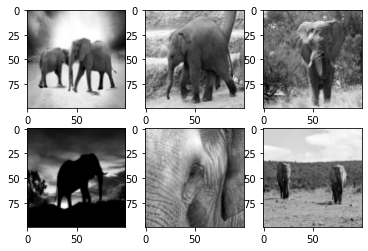

In [17]:
# show data 
plt.subplot(2, 3, 1)
plt.imshow(X[1],cmap = 'gray')
plt.axis('on')
plt.subplot(2, 3, 2)
plt.imshow(X[2],cmap = 'gray')
plt.axis('on')
plt.subplot(2, 3, 3)
plt.imshow(X[3],cmap = 'gray')
plt.axis('on')
plt.subplot(2, 3, 4)
plt.imshow(X[89],cmap = 'gray')
plt.axis('on')
plt.subplot(2, 3, 5)
plt.imshow(X[150],cmap = 'gray')
plt.axis('on')
plt.subplot(2, 3, 6)
plt.imshow(X[180],cmap = 'gray')
plt.axis('on')
plt.show()

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, metrics, model_selection

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
number_of_val = X_val.shape[0]


x_train = X_train.reshape(number_of_train,  X_train.shape[1]*X_train.shape[2])
x_test = X_test .reshape(number_of_test,  X_test.shape[1]*X_test.shape[2])
x_val = X_val.reshape(number_of_val,  X_val.shape[1]*X_val.shape[2])
 
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("x val: ",x_val.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)
print("y val: ",y_val.shape)

x train:  (1293, 10000)
x test:  (432, 10000)
x val:  (432, 10000)
y train:  (1293, 1)
y test:  (432, 1)
y val:  (432, 1)


In [20]:
print(X_train)

[[[0.5543455  0.53198723 0.6298351  ... 0.62816857 0.66473305 0.56471105]
  [0.54655158 0.57123675 0.69057273 ... 0.63516806 0.64212926 0.60598074]
  [0.60228838 0.64957594 0.77945494 ... 0.60636106 0.57627789 0.63152485]
  ...
  [0.48257781 0.39430619 0.35310697 ... 0.42535619 0.44063109 0.44523806]
  [0.4599674  0.42958155 0.35779987 ... 0.45558079 0.46674275 0.47414433]
  [0.43476416 0.42024007 0.40819158 ... 0.50415252 0.52406374 0.54359574]]

 [[0.49809655 0.48871354 0.52537821 ... 0.29801951 0.15540655 0.24352376]
  [0.52836583 0.48424007 0.47765519 ... 0.37385954 0.39100259 0.41075932]
  [0.57831494 0.54129519 0.50693873 ... 0.31545711 0.37039083 0.39338093]
  ...
  [0.85573263 0.84819122 0.83703341 ... 0.75250893 0.72923976 0.72570177]
  [0.84992714 0.83931621 0.8329412  ... 0.70349107 0.70330841 0.62297486]
  [0.85352485 0.83687517 0.8495434  ... 0.67922596 0.65571804 0.62389631]]

 [[0.77215508 0.75794095 0.75639757 ... 0.77718864 0.77709591 0.79099098]
  [0.75555864 0.742030

In [21]:
print(X_test)

[[[0.63814929 0.64036812 0.63487035 ... 0.69237127 0.68697915 0.66910819]
  [0.63245897 0.6334613  0.62665922 ... 0.71798881 0.70828583 0.69775401]
  [0.65172138 0.67213179 0.66615268 ... 0.70719255 0.67265595 0.68420754]
  ...
  [0.63003564 0.65265729 0.56584844 ... 0.82599842 0.81942718 0.81808687]
  [0.66557889 0.73142257 0.70441908 ... 0.82311339 0.81746888 0.81516632]
  [0.72432857 0.75844735 0.77357852 ... 0.82246437 0.81338641 0.81039462]]

 [[0.1017681  0.07368758 0.10062544 ... 0.09715579 0.09646902 0.09903288]
  [0.11040816 0.07439361 0.11586014 ... 0.10151197 0.09706956 0.10000815]
  [0.11166188 0.07958125 0.11404482 ... 0.11144895 0.10905384 0.11195997]
  ...
  [0.90689464 0.92180696 0.91339017 ... 0.6579978  0.65197964 0.64706046]
  [0.85396767 0.84426511 0.83114316 ... 0.73913191 0.73517752 0.70427548]
  [0.77765379 0.81412416 0.82918419 ... 0.70174564 0.69137999 0.66606965]]

 [[0.77966995 0.7853257  0.78949434 ... 0.81730767 0.81451051 0.80989794]
  [0.78127889 0.786812

In [22]:
print(y_train)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [23]:
print(y_test)

[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]


In [24]:
print(X_val)

[[[0.32285039 0.26583134 0.27086023 ... 0.33452584 0.33022898 0.45405447]
  [0.208761   0.24198532 0.30936625 ... 0.3043088  0.30673873 0.34019289]
  [0.31269047 0.2246398  0.31868705 ... 0.30343114 0.29168184 0.32522339]
  ...
  [0.7691174  0.74679853 0.76078776 ... 0.80871789 0.69081484 0.77631387]
  [0.72444362 0.64664522 0.74278343 ... 0.81588038 0.81072987 0.82325901]
  [0.76114156 0.75224962 0.76281139 ... 0.78962539 0.81910526 0.83042395]]

 [[0.99097937 0.99097937 0.99097937 ... 0.99098002 0.99244815 0.99584439]
  [0.99422994 0.99422994 0.99422994 ... 0.99423039 0.99525057 0.99761055]
  [0.99103269 0.99103269 0.99103269 ... 0.99103332 0.99243278 0.99567017]
  ...
  [0.99215686 0.99215686 0.99215686 ... 0.99607791 0.99607791 0.99607791]
  [0.99217477 0.99217477 0.99217477 ... 0.99491779 0.99491779 0.99491779]
  [0.99488198 0.99488198 0.99488198 ... 0.99489989 0.99489989 0.99489989]]

 [[0.52899813 0.50095256 0.49890844 ... 0.59257063 0.56519074 0.54849576]
  [0.56610683 0.518007

In [25]:
print(y_val)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]


In [26]:
len(x_train)

1293

In [27]:
len(x_test)

432

In [28]:
len(x_val)

432

Automatically created module for IPython interactive environment


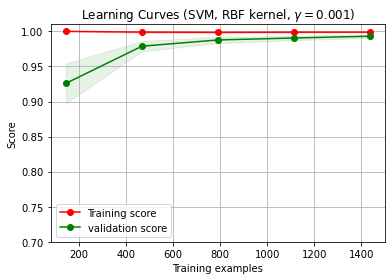

In [29]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()

X, y = digits.data, digits.target

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, metrics, model_selection, svm
from sklearn.svm import SVC

In [31]:
classifier = SVC(kernel = 'linear', random_state = 0,C=0.001,gamma=0.001,decision_function_shape ='ovr'
                ,verbose=True,class_weight=None,cache_size=100,tol=0.001,probability=False,coef0=0.0,max_iter=-1)
classifier.fit(x_train, y_train)

[LibSVM]

SVC(C=0.001, cache_size=100, gamma=0.001, kernel='linear', random_state=0,
    verbose=True)

In [32]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

In [33]:
classifier.score(x_test,y_test)

0.9467592592592593

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[409   0]
 [ 23   0]]


0.9467592592592593

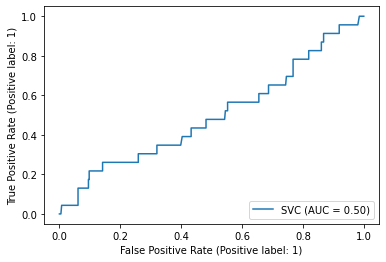

In [35]:
metrics.plot_roc_curve(classifier, x_test, y_test)
plt.show()